In [1]:
import os
import sys

def is_colab():
    return 'google.colab' in sys.modules

if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    PROJECT_PATH = '/content/drive/MyDrive/NBS_project/'
else:
    # 自动根据当前脚本定位项目根路径
    PROJECT_PATH = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) \
        if '__file__' in globals() else os.getcwd()

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)

print(f"项目路径设置为: {PROJECT_PATH}")

from src.config import Config
from src.main import create_MDs,create_ESP
import src.baseline as baseline
import src.NBS as NBS
import src.model as model
import numpy as np
import matplotlib.pyplot as plt


项目路径设置为: c:\Users\Barytes\Desktop\NBS_project


In [2]:
CONFIG_PATH = os.path.join(PROJECT_PATH, "configs", "test.json")
config = Config(CONFIG_PATH)

In [3]:
# Experiment 1: Performance of Proposed Algorithm

lambda0 = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
sw_uni, sw_pro, sw_non, sw_con, sw_swm, sw_admm = [],[],[],[],[],[]
Dm_uni, Dm_pro, Dm_non, Dm_con, Dm_swm, Dm_admm = [],[],[],[],[],[]
for l0 in lambda0:
  config.params["lambda0"] = l0
  print(f"=====Lambda 0: {l0}=====")
  
  seed = 41
  MDs = create_MDs(config, seed=seed)
  esp = create_ESP(config, seed=seed)
  # for md in MDs[:n]:
  #   print(md.param)
  # print(esp.param)

  T = 15
  N = len(MDs)
  lam_uni, p_uni, r_uni, Dmax_uni = np.zeros(N),np.zeros(N),np.zeros(N),0
  for _ in range(T):
      l,p,r,d = baseline.uniform_baseline_smarter(esp, MDs)
      lam_uni += l
      p_uni += p
      r_uni += r
      Dmax_uni += d
  lam_uni, p_uni, r_uni, Dmax_uni = lam_uni/T, p_uni/T, r_uni/T, Dmax_uni/T
  print(f"Uniform Baseline: SW={model.social_welfare(esp, MDs, lam_uni, p_uni)}, Dmax={Dmax_uni}")

  lam_pro, p_pro, r_pro, Dmax_pro = np.zeros(N),np.zeros(N),np.zeros(N),0
  for _ in range(T):
      l,p,r,d = baseline.proportional_baseline_smarter(esp,MDs)
      lam_pro += l
      p_pro += p
      r_pro += r
      Dmax_pro += d
  lam_pro, p_pro, r_pro, Dmax_pro = lam_pro/T, p_pro/T, r_pro/T, Dmax_pro/T
  print(f"Proportional Baseline: SW={model.social_welfare(esp, MDs, lam_pro, p_pro)}, Dmax={Dmax_pro}")

  lam_non, p_non, r_non, Dmax_non = baseline.non_cooperative_baseline(esp,MDs)
  print(f"Non-Cooperative Baseline: SW={model.social_welfare(esp, MDs, lam_non, p_non)}, Dmax={Dmax_non}")
  lam_con, p_con, r_con, Dmax_con = baseline.contract_type_based_baseline(esp,MDs,K=5)
  print(f"Contract Baseline: SW={model.social_welfare(esp, MDs, lam_con, p_con)}, Dmax={Dmax_con}")
  lam_swm, p_swm, Dmax_swm = baseline.social_welfare_maximization(esp, MDs)
  print(f"SWM Baseline: SW={model.social_welfare(esp, MDs, lam_swm, p_swm)}, Dmax={Dmax_swm}")
  lamb_admm, p_admm, Dmax_admm = NBS.ADMM(esp, MDs)
  r_admm = NBS.negotiation(esp, MDs,lamb_admm, p_admm, Dmax_admm)
  print(f"ADMM Baseline: SW={model.social_welfare(esp, MDs, lamb_admm, p_admm)}, Dmax={Dmax_admm}")

  sw_uni.append(model.social_welfare(esp, MDs, lam_uni, p_uni))
  sw_pro.append(model.social_welfare(esp, MDs, lam_pro, p_pro))
  sw_non.append(model.social_welfare(esp, MDs, lam_non, p_non))
  sw_con.append(model.social_welfare(esp, MDs, lam_con, p_con))
  sw_swm.append(model.social_welfare(esp, MDs, lam_swm, p_swm))
  sw_admm.append(model.social_welfare(esp, MDs, lamb_admm, p_admm))
  Dm_uni.append(Dmax_uni)
  Dm_pro.append(Dmax_pro)
  Dm_non.append(Dmax_non)
  Dm_con.append(Dmax_con)
  # Dm_rev.append(0)  # Placeholder for reverse auction
  # Dm_gre.append(0)  # Placeholder for greedy heuristic
  Dm_swm.append(Dmax_swm)
  Dm_admm.append(Dmax_admm)
  print("===================")
sw = [sw_uni, sw_pro, sw_non, sw_con, sw_admm]
Dm = [Dm_uni, Dm_pro, Dm_non, Dm_con, Dm_admm]


=====Lambda 0: 50=====
Uniform Baseline: SW=-13.877403089020394, Dmax=0.9395653779618254
Proportional Baseline: SW=0.8661888212501836, Dmax=0.9001303872655358
Non-Cooperative Baseline: SW=17.837201999109954, Dmax=0.6462592203904358
Contract Baseline: SW=24.965554687837052, Dmax=0.4751428129798465
SWM Baseline: SW=27.97548587926783, Dmax=0.31978102870081415
ADMM Baseline: SW=27.94339029993981, Dmax=0.31986595850344285
=====Lambda 0: 60=====
Uniform Baseline: SW=-10.614055634440055, Dmax=0.9295526787266825
Proportional Baseline: SW=13.094788061454533, Dmax=0.8781000908694521
Non-Cooperative Baseline: SW=25.032474701122077, Dmax=0.6715624257953359


d:\Program\Anaconda\envs\tensorflow\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Contract Baseline: SW=32.37036605457096, Dmax=0.5188391645024805
SWM Baseline: SW=36.94773710356539, Dmax=0.3254382967143816
ADMM Baseline: SW=36.91829326427138, Dmax=0.325525829895615
=====Lambda 0: 70=====
Uniform Baseline: SW=-10.363645815249098, Dmax=0.9412139391347467
Proportional Baseline: SW=19.000539210130476, Dmax=0.8869970523515589
Non-Cooperative Baseline: SW=32.11595762947237, Dmax=0.6940273289788824
Contract Baseline: SW=40.5111081839659, Dmax=0.5191979162249661
SWM Baseline: SW=45.86292781705936, Dmax=0.3309200465632466
ADMM Baseline: SW=45.83560738747566, Dmax=0.3310089867650932
=====Lambda 0: 80=====
Uniform Baseline: SW=10.05827911185917, Dmax=0.9422232847359998
Proportional Baseline: SW=28.61377515729989, Dmax=0.8805708771033536
Non-Cooperative Baseline: SW=39.11531394584731, Dmax=0.713855679288142
Contract Baseline: SW=45.76545010423858, Dmax=0.6083070985285195
SWM Baseline: SW=54.72093295862184, Dmax=0.33623383981192684
ADMM Baseline: SW=54.69588579013609, Dmax=0.33

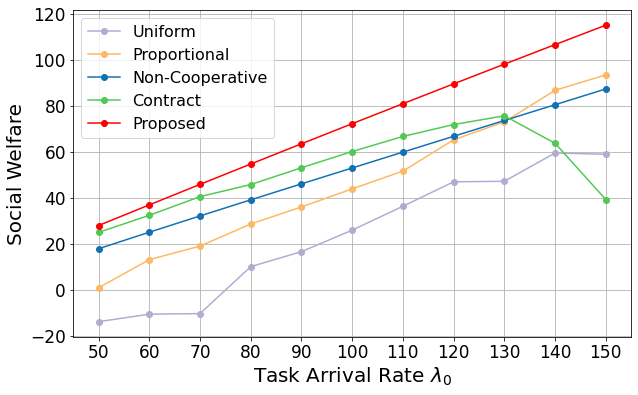

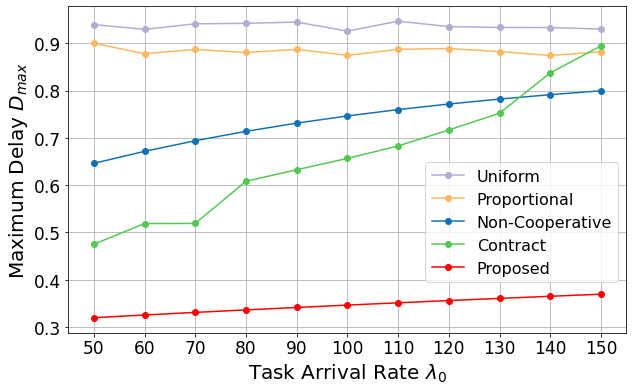

In [4]:
baselines = ['Uniform', 'Proportional', 'Non-Cooperative', 'Contract', 'Proposed']
color_map = {
    'Proposed': 'red',
    'Contract': "#52c952",  # 橙色 (更鲜艳的橙色)
    'Non-Cooperative': "#1271b5",  # 绿色
    'Proportional': '#fdb863',  # 天蓝色
    'Uniform': "#b2abd2"    # 浅灰色
}
plt.rc('axes', labelsize=20)         # 坐标轴标签字体
plt.rc('xtick', labelsize=17)        # x 轴刻度
plt.rc('ytick', labelsize=17)        # y 轴刻度
plt.rc('legend', fontsize=16)        # 图例

plt.figure(figsize=(10, 6)) # 设置图的大小
for i, data in enumerate(sw):
    plt.plot(lambda0, data, marker='o', label=f'{baselines[i]}',color=color_map[baselines[i]])

# plt.title('Social Welfare vs. $\lambda_0$')
plt.xlabel('Task Arrival Rate $\lambda_0$')
plt.ylabel('Social Welfare')
plt.xticks(lambda0) # 确保 N 值在横轴上清晰显示
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6)) # 设置图的大小
for i, data in enumerate(Dm):
    plt.plot(lambda0, data, marker='o', label=f'{baselines[i]}',color=color_map[baselines[i]])

# plt.title('Delay vs. $\lambda_0$')
plt.xlabel('Task Arrival Rate $\lambda_0$')
plt.ylabel('Maximum Delay $D_{max}$')
plt.xticks(lambda0) # 确保 N 值在横轴上清晰显示
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.13))
plt.show()

In [6]:
# sw_opt, Dm_opt = [], []
# for l0 in lambda0:
#     print(f"=====Lambda 0: {l0}=====")
#     esp.lambda0 = l0
#     lam_opt, p_opt, r_opt, Dmax_opt = baseline.optimal_NBP_fast(esp, MDs)
#     print(lam_opt, p_opt, r_opt, Dmax_opt)
#     sw_opt.append(model.social_welfare(esp, MDs, lam_opt, p_opt))
#     Dm_opt.append(Dmax_opt)
#     print(f"Optimal Baseline: SW={sw_opt[-1]}, Dmax={Dmax_opt}")

# print(f"Opt SOcial Welfare: {sw_opt}")
print(f"SWM Social Welfare: {sw_swm}")
print(f"ADMM Social Welfare: {sw_admm}")
# print(f"Optimal Maximum Delay: {Dm_opt}")
print(f"SWM Maximum Delay: {Dm_swm}")
print(f"ADMM Maximum Delay: {Dm_admm}")

SWM Social Welfare: [27.97548587926783, 36.94773710356539, 45.86292781705936, 54.72093295862184, 63.521491928285165, 72.26427595435193, 80.94892217089125, 89.57504662506156, 98.14225449742361, 106.6501484533611, 115.0983192479622]
ADMM Social Welfare: [27.94339029993981, 36.91829326427138, 45.83560738747566, 54.69588579013609, 63.49817639036443, 72.24264333211488, 80.92861592169777, 89.55562476900023, 98.12426869152003, 106.63317493934674, 115.08190968608292]
SWM Maximum Delay: [0.31978102870081415, 0.3254382967143816, 0.3309200465632466, 0.33623383981192684, 0.34138810828188587, 0.3463907669437433, 0.35124993136389443, 0.35597200329926254, 0.3605679540243359, 0.3650415051283474, 0.36939998405006963]
ADMM Maximum Delay: [0.31986595850344285, 0.325525829895615, 0.3310089867650932, 0.33632030636984367, 0.3414745988620725, 0.3464757033214588, 0.351336071920772, 0.3560574651159886, 0.36065097567719123, 0.3651258175664507, 0.36948244575929196]


In [ ]:
# Experiment 2: Comparison of NBS and Non-Cooperative

In [ ]:
# Experiment 3: Impact of Bargaining Power

In [ ]:
# Experiment 4: Impact of Task Workload

In [ ]:
# Experiment 5: Impact of QoS Requirement